This notebook demonstrates some kernels from the S+Leaf package

In [1]:
import os
import sys
import math
%load_ext autoreload
%autoreload 2

import numpy as np

# Plotting tools
from matplotlib import pyplot as plt
# we use the following for plotting figures in jupyter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Use Celerite v2
import celerite2
from celerite2 import terms

import pandas as pd
pd.set_option('precision', 0)
pd.set_option('display.float_format', lambda x: '%.16f' % x)

# Start the notebook from the root of the project
if 'notebooks' in os.getcwd():
    os.chdir(os.path.dirname(os.getcwd()))
    if os.getcwd().endswith('notebooks'):
        os.chdir(os.path.dirname(os.getcwd()))

 # Local imports (i.e., my code) from the src folder
sys.path.insert(0, os.path.join(os.getcwd(), 'src'))

from plot_helpers import *
plotter = PlotUtilCelerite()

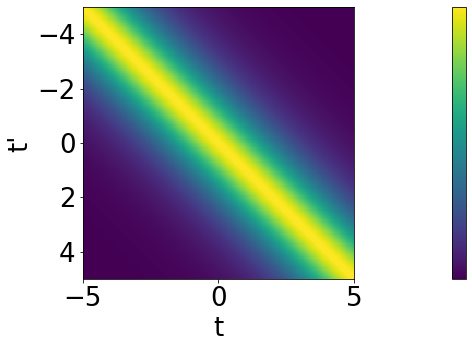

In [2]:
sho = terms.SHOTerm(sigma=0.5, w0=1, Q=0.5)
#sho = terms.SHOTerm(sigma=1.0, rho=5.0, tau=1.0)
plotter.plot_2d_kernel(sho)

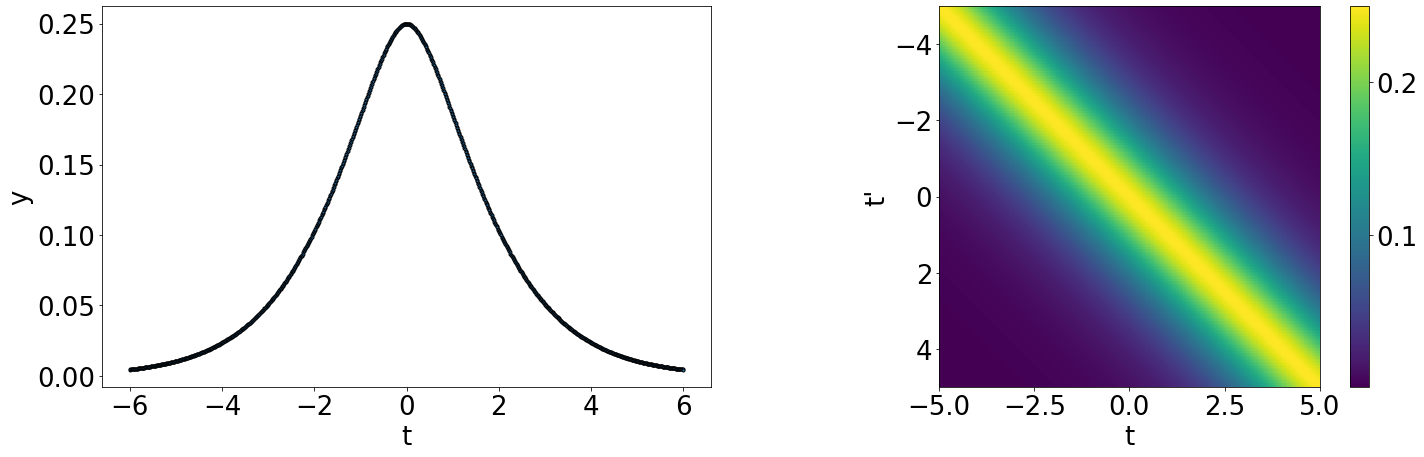

In [6]:
mtn = terms.Matern32Term(sigma=0.5, rho=1.75)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 7))
plotter.plot_1d_kernel(mtn, ax=ax1, label="covariance between 0 and x")
plotter.plot_2d_kernel(mtn, fig, ax2, [0.1, 0.2])

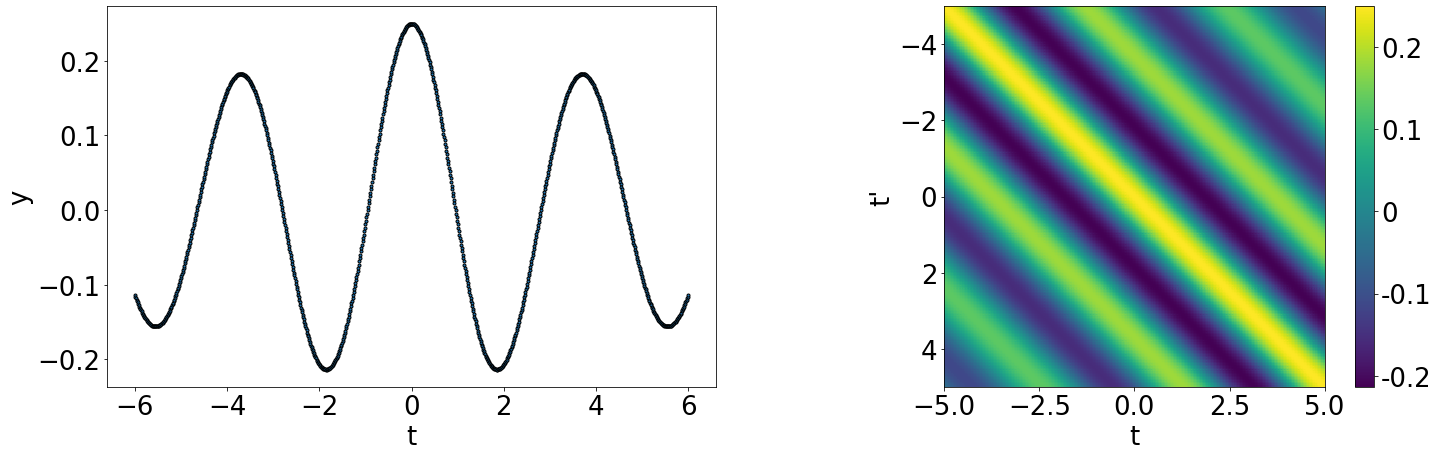

In [11]:
sho = terms.SHOTerm(sigma=0.5, w0=1.7, Q=10)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 7))
plotter.plot_1d_kernel(sho, ax=ax1, label="covariance between 0 and x")
plotter.plot_2d_kernel(sho, fig, ax2, [-0.2, -0.1, 0, 0.1, 0.2])


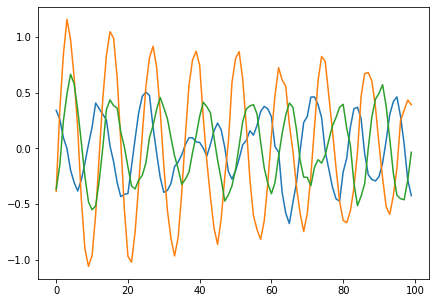

In [26]:
sho = terms.SHOTerm(sigma=0.5, w0=100, Q=8000)
gp = celerite2.GaussianProcess(sho, mean=0.0)
gp.compute(np.linspace(1, 100, 100), yerr=0)
plt.figure(figsize=(7, 5))
plotter.plot_kernel_samples(gp, nr_of_data_points=100, nr_of_samples=3)

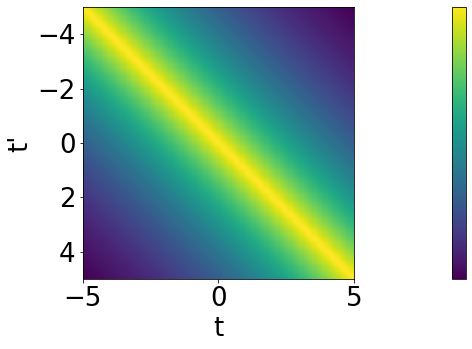

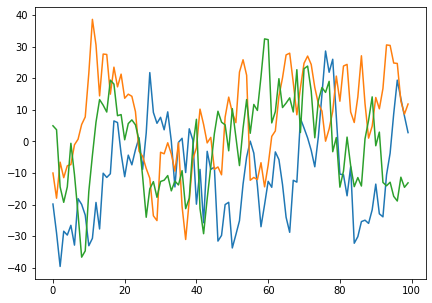

In [9]:
sho1 = terms.SHOTerm(sigma=17.487, w0=1.7637, Q=0.1)
sho2 = terms.SHOTerm(sigma=13.482, w0=1.7937, Q=0.1)
sho3 = terms.SHOTerm(sigma=8.378, w0=1.7590, Q=0.1)
sho4 = terms.SHOTerm(sigma=7.468, w0=0.8889, Q=0.1)
sho5 = terms.SHOTerm(sigma=6.559, w0=1.8292, Q=0.1)

plotter.plot_2d_kernel(sho1+sho2+sho3+sho4+sho5)
gp = celerite2.GaussianProcess(sho1, mean=0.0)
gp.compute(np.linspace(1, 100, 100), yerr=0)
plt.figure(figsize=(7, 5))
plotter.plot_kernel_samples(gp, nr_of_data_points=100, nr_of_samples=3)